###  Trabajo práctico Módulo 4

## Protocolo de emergencia frente a una reacción de fusión nuclear descontrolada

#### MOOC: Transferencia de Calor y Masa Computacional

Imagine que usted trabaja en el laboratorio Nacional de Los Álamos en un proyecto que busca obtener cantidades sin precedentes de energía mediante fusión nuclear. Usted está a cargo del protocolo de seguridad experimental frente a una reacción nuclear descontrolada. En particular, se le pide que diseñe un sistema de mitigación de calor en caso de una reacción nuclear descontrolada.

La Figura 1 una esfera de 16 cm de radio que contiene 1 kg de la mezcla Deuterio-Tritio. A partir de una nueva tecnología de campos gravitacionales, los experimentalistas afirman que lograron realizar una reacción controlada de fusión a 600°C. Sin embargo, si el enfriamiento falla, la temperatura de la esfera aumentará producto de la reacción de fusión. 

<div>
  <img src="figs/fig1_DT_TP4.png" width="600"/>
  <figcaption>Figura 1: Protocolo de seguridad para esfera Deuterio-Tritio </figcaption>
</div>


Este aumento de temperatura es muy rápido y se puede modelar como un término volumétrico de generación de calor:


$$ S = 1 \text{MW}/\text{m}^3 $$

 En caso de llegar a 1100°C, la fusión se volverá descontrolada y todo el laboratorio nacional se desintegraría en segundos junto a todo su personal. 

La ecuación de conservación de energía dentro de la esfera es

$$ \rho_1 \hat{c}_{p}\frac{\partial T}{\partial t} = \frac{k}{r^2} \frac{\partial}{\partial r} \left(r^2 \frac{\partial T}{\partial r} \right) + S, \hspace{2cm} 0 < r < R_1 $$

En $r=0$, el perfil de temperatura es simétrico lo que se traduce en la siguiente condición de borde:

$$ \frac{\partial T}{\partial r}|_{r=0} = 0 $$

El protocolo de seguridad actual consiste en lanzar la esfera a un receptáculo muy grande con agua con hielo. En una emergencia, esto produciría la evaporación súbita del agua adyacente a la esfera. En $r=R$, existe enfriamiento de la superficie de la esfera por evaporación de película. Esto se traduce en la siguiente condición de borde:

$$ -k \frac{\partial T}{\partial r}|_{r=R} = h(T|_{r=R} - T_\infty) $$

El sistema actual está configurado con las siguientes propiedades termofísicas:

#### Esfera de material compuesto poroso con Deuterio-Tritio:
* Conductividad térmica: $ k_1 = 10 \text{ W/mK}$
* Calor específico: $\hat{c}_p = 900 \text{ J/kg/°C}$
* La densidad se puede calcular a partir de los datos experimentales
* Condiciones iniciales: $T(t=0) = 873.15 K $

#### Transferencia de calor
* Temperatura de ebullición del agua a presión atmosférica: $T_{\infty} = 373.15 K$
* Coeficiente de transferencia de calor por cambio de fase: $h = 10000 \text{W}/\text{m}^2/\text{K}$

Se le solicita evaluar si el sistema de seguridad es suficiente para prevenir que la temperatura en cualquier punto y momento sea inferior a 1100°C.

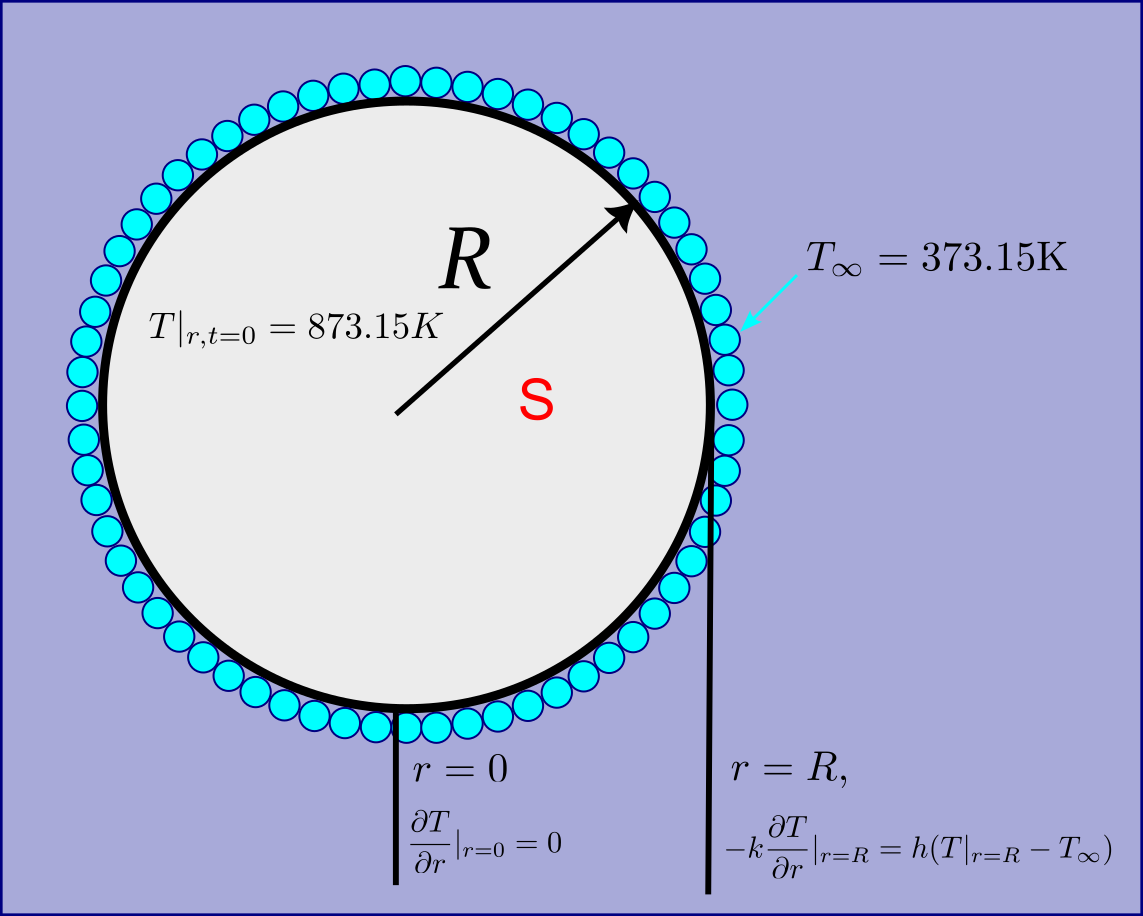

#### Parte 1. Discretice la EDP utilizando diferencias finitas de segundo orden y el método FTCS

#### 1.1 Discretice los nodos interiores, utilizando:
* Diferencias finitas hacia adelante de primer orden en el tiempo para la derivada temporal
* Diferencias finitas centrales de segundo orden en el espacio para las derivadas espaciales



$$ \rho_1 \hat{c}_{p}\frac{\partial T}{\partial t} = \frac{k}{r^2} \frac{\partial}{\partial r} \left(r^2 \frac{\partial T}{\partial r} \right) + S, \hspace{2cm} 0 < r < R_1 $$

$$
\rho_1 \,\hat{c}_{p}\,\frac{\partial T}{\partial t}
= k\left( \frac{\partial^{2} T}{\partial r^{2}} + \frac{2}{r}\,\frac{\partial T}{\partial r} \right) + S
$$

y denotando $$\alpha = \frac{k}{\rho_1 \hat{c}_p}$$


$$
T_i^{\,j+1}
= T_i^{\,j}
+ \alpha\,\Delta t\!\left[
\frac{T_{i+1}^{\,j}-2T_i^{\,j}+T_{i-1}^{\,j}}{(\Delta r)^2}
+\frac{1}{i}\,\frac{T_{i+1}^{\,j}-T_{i-1}^{\,j}}{\Delta r^2}
\right]
+\frac{\Delta t}{\rho_1 \hat{c}_{p}}\,S,
\qquad i=1,\dots,N-1
$$

$$\qquad
r_i=i\,\Delta r.
$$

#### 1.2 Encuentre los coeficientes de la matriz A en la ecuación de evolución

### Forma simplificada

$$
T_{i}^{j+1} = T_i^j + \frac{\alpha \Delta t}{(\Delta r)^2}\left[\left(1 + \frac{1}{i}\right)T_{i+1}^j - 2T_i^j + \left(1 - \frac{1}{i}\right)T_{i-1}^j \right] + \Delta t\frac{S}{\rho \hat{c_p}}
$$


### Expresión Matricial
Finalmente la expresión matricial es:

$$ 
\mathbf{T}^{n+1} = \mathbf{T}^n + \Delta t\left[ \frac{\alpha}{(\Delta r)^2}A \cdot \mathbf{T}^n + b\right]
$$ 


#### 1.3) Discretice las condiciones de borde
* Utilice diferencias finitas hacia adelante o atrás, según corresponda, de segundo orden.
* Se le recomienda despejar las temperaturas del nodo inicial $T^{t+1}_0$ y el nodo final $T_N^{t}$ en función de los nodos adyacentes.
* Esto le permitirá implementar el método de manera más sencilla.
* En esta implementación, usted deberá dejar la primera y última fila de la matriz de coeficientes A vacía, así como también el primer y último elemento del vector $\mathbf{b}$ vacío.

### Condiciones de borde ###

**Neumann (continua):**
$$
\left.\frac{\partial T}{\partial r}\right|_{r=0}= 0 
$$

**Neumann simplificada:**
$$
\frac{dT_0}{dt} = \frac{6\alpha}{(\Delta r)^2}(T_1 - T_0) + \frac{S}{\rho \hat{c_p}} 
$$

**Neumann (para este caso):**
$$
T_{0} = \frac{4T_1 - T_2}{3}
$$


**Robin (continua):**
$$
-k\,\left.\frac{\partial T}{\partial r}\right|_{r=R}
= h\,(T_R - T_\infty).
$$


**Robin simplificada:**

$$
\frac{dT_{N-1}}{dt} = 
\frac{2\alpha}{(\Delta r)^2} T_{N-2} 
- \frac{2\alpha}{(\Delta r)^2}\left(1 + \frac{h\Delta r}{k}\right)T_{N-1} + \frac{2\alpha h}{k\Delta r}T_\infty 
+ \frac{S}{\rho \hat{c_p}} 
$$


**Robin (para este caso):**

$$
T_{N-1} = \frac{-4T_{N-1} + 2T_{N-2} + \gamma~T_{\infty}}{\gamma - 3},
\qquad \gamma= \frac{-2h\Delta r}{k}
$$




### Parte 2) Implementación del método numérico

#### 2.1 - Importar módulos

In [17]:
# Cálculos numéricos
import numpy as np

# Gráficos
import matplotlib.pyplot as plt

# Mapas de colores
from matplotlib import cm

#### 2.2 Declaración de parámetros físicos

* Defina las propiedades termofísicas del problema
* Calcule la densidad de la esfera interna
* Calcule la difusividad térmica

In [18]:
# Ingrese el radio de la esfera
R = 0.16 #m

# Calcule el volumen de la esfera

V = (4/3)*np.pi*R**3 #m^3

# Ingrese la masa de la esfera
m = 1 #kg   

# Calcule la densidad de la esfera
rho = m/V

# Ingrese la conductividad térmica y el calor específico de la esfera
k = 10 # W/mK conductividad termica
c_p = 900 # J/Kg*C ya que estaba en celsius

# Ingrese el término de fuente
S = 1e6 #W/m^3 CORRECCIÓN MENOR: SE PUEDE ESCRIBIR COMO 1E6 EN VEZ DE 10**6
# Calcule la difusividad térmica
alpha = k/(rho*c_p) #esto es alpha, lo anote así por comodidad

# Coeficiente de transferencia de calor por convección natural
h_conv = 10000 # W/m^2 * K

# Ingrese la temperatura inicial de la esfera
T_0 = 873.15 # K 

# Ingrese la temperatura del sumidero de calor
T_infty = 373.15 # K

#### 2.3 Definición de los parámetros de grilla y computacionales

Se le solicita resolver el problema considerando los siguientes parámetros:

* 100 nodos en la dirección radial
* Un paso de tiempo que corresponda a un Número de Fourier computacional igual a 0.45, 
$$\text{Fo}_c = 0.45$$ 

In [19]:
# Número de nodos
n_r = 100

# Crear un dominio discretizado
r = np.linspace(0, R, n_r)

# Espaciamiento o paso radial
dr = R/(n_r-1)

# Paso de tiempo
FOc = 0.45

dt = (FOc*dr**2)/alpha #s

##CONDICION INICIAL 
T = np.ones(n_r)*T_0


# Construcción de matriz A y vector del lado derecho
A = np.zeros([n_r,n_r])
b= np.zeros(n_r) # CORRECCIÓN: Cambie el nombre porque solo hay una parte cte.


#### 2.4 Rellenar matriz A - nodos interiores

In [20]:
# Iteración en nodos interiores
for i in range(1,n_r-1):
    # Coeficiente que acompaña a T_{i-1}^j
    A[i,i-1] = (alpha/dr**2)*(1-(1/i))
    
    # Coeficiente que acompaña a T_{i}^j
    A[i,i] = -2*(alpha/dr**2)

    # Coeficiente que acompaña a T_{i+1}^j
    A[i,i+1] = (alpha/dr**2)*((1/i)+1)
    
    # Vector del lado derecho
    b[i] = S/(rho*c_p)

### Condiciones de borde ###

In [21]:
#Condicion de borde 1:
# CORRECCIÓN: Según el enunciado este se debe ingresar como 0 y luego se aplica en el loop de iteración
A[0,0] = 0
A[0,1] = 0
A[0,2] = 0
b[0] = 0

#Condicion de borde 2:
# CORRECCIÓN: Según el enunciado este se debe ingresar como 0 y luego se aplica en el loop de iteración
A[-1,-1] = 0
A[-1, -2] = 0
A[-1, -3] = 0
b[-1] = 0

#### 2.5 - Definir parámetros FTCS

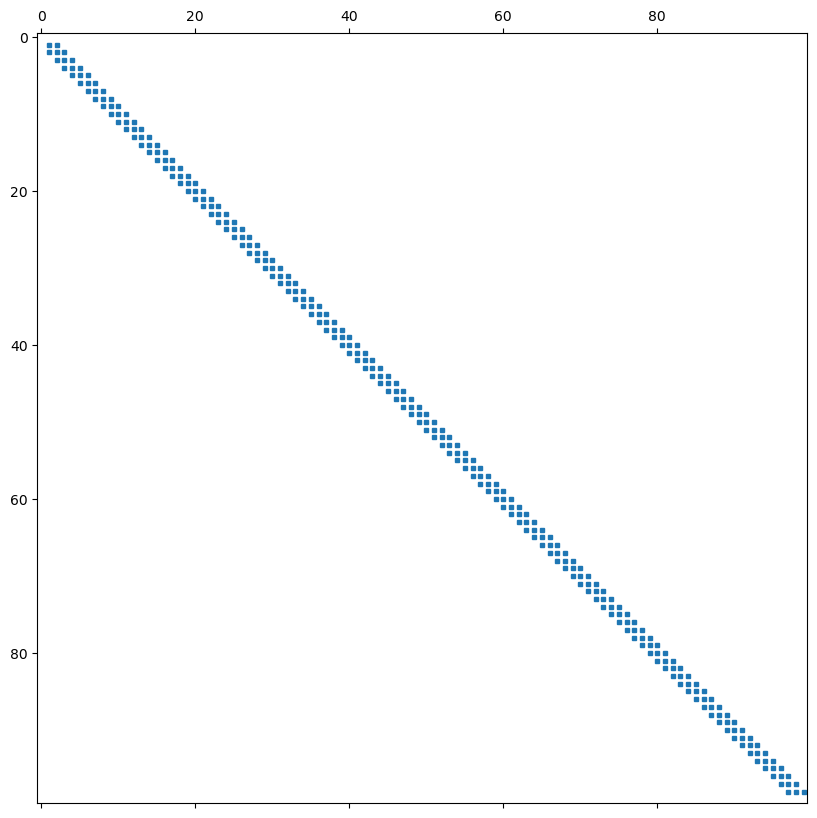

In [7]:
# Grabe los resultados después de una fracción que estime conveniente. Por ejemplo, t = 3 s:

# Creamos un gráfico de 3 x 3
fig, ax = plt.subplots(1, 1, figsize = [10,10])

# Graficamos spy
ax.spy(A, markersize = 3)
plt.show()


#### 2.6 Implementar el algoritmo FTCS

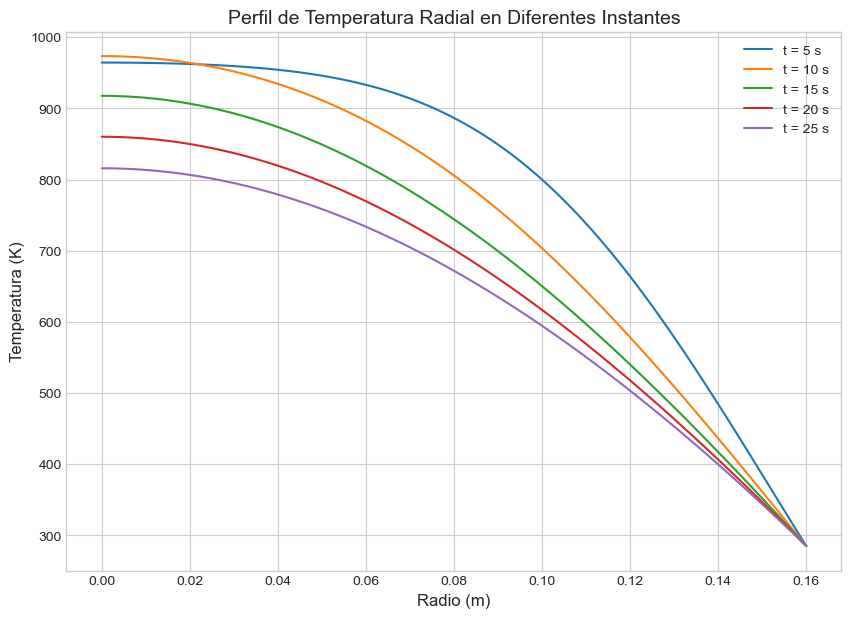

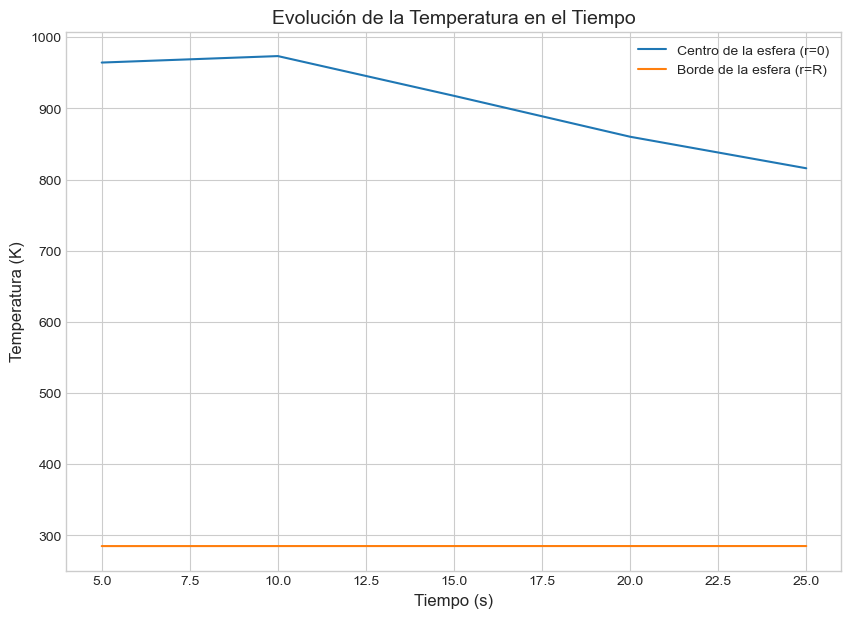

In [19]:
## Algoritmo FTCS
t = 0
# Aumenta el tiempo final para poder responder las preguntas del quiz
t_max = 25
write_interval = 5 # Guarda con menos frecuencia para no tener tantos perfiles

# Lista en que se acumulan los tiempos donde se graban los perfiles de temperatura
t_vec = []

# Lista con los perfiles de temperatura para cada write_interval
T_num = []

# Copie la temperatura T en otra variable, utilizando la función np.copy()
T_old = np.copy(T)

gamma = (-2*h_conv*dr)/k

# Iteración de evolución
while t < t_max:
    # 1. Actualizar nodos interiores (las filas 0 y -1 de A son cero, así que no afectan los bordes aquí)
    T_new = T_old + (np.dot(A, T_old) + b) * dt
    
    # 2. APLICAR CONDICIÓN DE BORDE EN r=R (SOBREESCRIBIR T_new[-1])
    T_new[-1] = (-4* T_new[-2] + 2* T_new[-3]+gamma*T_infty)/(gamma-3)
    
    # 3. APLICAR CONDICIÓN DE BORDE EN r=0 (SOBREESCRIBIR T_new[0])
    #    (Usando la fórmula correcta para el centro)
    T_new[0]=(4*T_new[1]-T_new[2])/3
    
    # 4. Actualizar tiempo y preparar para la siguiente iteración
    t += dt
    T_old = np.copy(T_new)
    
    # 5. Guardar resultados y registrar la temperatura máxima
    '''
    if np.max(T_new) > T_max_hist:
        T_max_hist = np.max(T_new)
        t_max_hist = t
    '''
    
    if (t % write_interval) < dt:        
        T_num.append(np.copy(T_new))
        t_vec.append(t)

    # en diferentes momentos de la simulación.
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 7))

# Iteramos sobre los resultados guardados para graficar cada perfil
for i in range(len(t_vec)):
    tiempo = t_vec[i]
    perfil_T = T_num[i]
    plt.plot(r, perfil_T, label=f't = {tiempo:.0f} s')

plt.xlabel('Radio (m)', fontsize=12)
plt.ylabel('Temperatura (K)', fontsize=12)
plt.title('Perfil de Temperatura Radial en Diferentes Instantes', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

T_centro = [perfil[0] for perfil in T_num]
T_borde = [perfil[-1] for perfil in T_num]

plt.figure(figsize=(10, 7))

plt.plot(t_vec, T_centro, label='Centro de la esfera (r=0)')
plt.plot(t_vec, T_borde, label='Borde de la esfera (r=R)')

plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Temperatura (K)', fontsize=12)
plt.title('Evolución de la Temperatura en el Tiempo', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [48]:
def FTCS(t, A, T_old, params ):
    t1, t2, wi = t
    b, dt, gamma, T_infty = params

    t_vec = []
    T_num = []
    
    while t1 < t2:
    # 1. Actualizar nodos interiores (las filas 0 y -1 de A son cero, así que no afectan los bordes aquí)
        T_new = T_old + (np.dot(A, T_old) + b) * dt
    
    # 2. APLICAR CONDICIÓN DE BORDE EN r=R (SOBREESCRIBIR T_new[-1])
        T_new[-1] = (-4* T_new[-2] + T_new[-3]+gamma*T_infty)/(gamma-3)
    
    # 3. APLICAR CONDICIÓN DE BORDE EN r=0 (SOBREESCRIBIR T_new[0])
    #    (Usando la fórmula correcta para el centro)
        T_new[0]=(4*T_new[1]-T_new[2])/3
    
    # 4. Actualizar tiempo y preparar para la siguiente iteración
        t1 += dt
        T_old = np.copy(T_new)
    
    
        if (t1 % wi) < dt:        
            T_num.append(np.copy(T_new))
            t_vec.append(t1)

    return  t_vec,T_num

    

In [49]:
gamma = (-2*h_conv*dr)/k
T_old = np.copy(T)
t = [0,25,5]
T = T_old
params = [b,dt,gamma, T_infty]

X, Y = FTCS(t, A, T, params) 

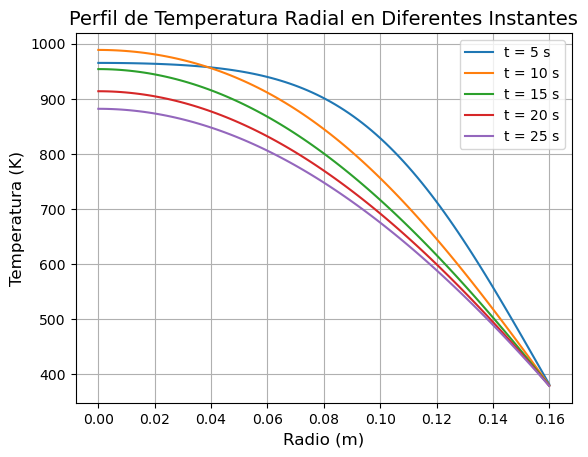

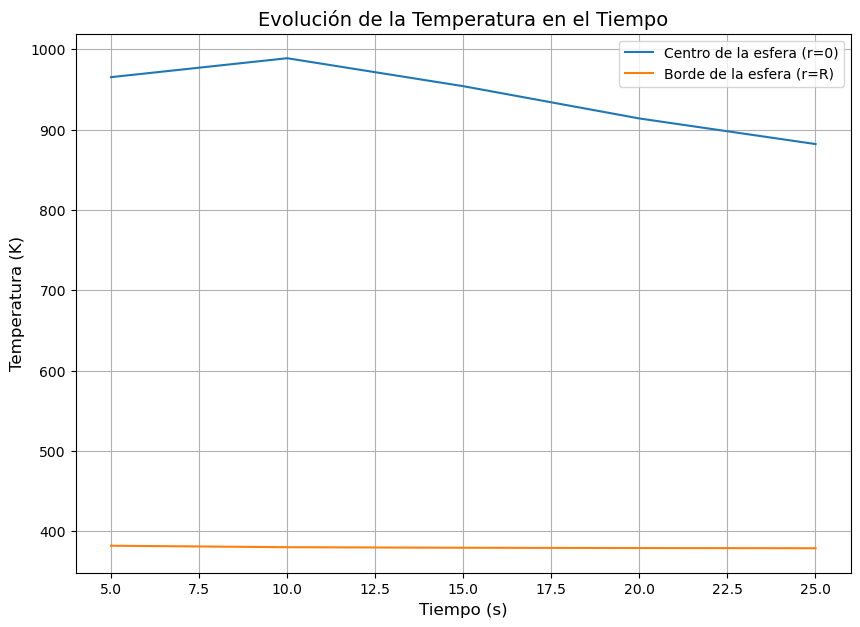

In [50]:
t_vec = X
T_num = Y

for i in range(len(t_vec)):
    tiempo = t_vec[i]
    perfil_T = T_num[i]
    plt.plot(r, perfil_T, label=f't = {tiempo:.0f} s')

plt.xlabel('Radio (m)', fontsize=12)
plt.ylabel('Temperatura (K)', fontsize=12)
plt.title('Perfil de Temperatura Radial en Diferentes Instantes', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

T_centro = [perfil[0] for perfil in T_num]
T_borde = [perfil[-1] for perfil in T_num]

plt.figure(figsize=(10, 7))

plt.plot(t_vec, T_centro, label='Centro de la esfera (r=0)')
plt.plot(t_vec, T_borde, label='Borde de la esfera (r=R)')

plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Temperatura (K)', fontsize=12)
plt.title('Evolución de la Temperatura en el Tiempo', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### Preguntas quiz

#### P1) Calcule la temperatura en K en el centro de la esfera después de 5 segundos de haber iniciado el protocolo de seguridad

In [51]:
# Resuelva la iteración para 5 segundos
gamma = (-2*h_conv*dr)/k
T_old = np.copy(T)
t = [0,25,5]
T = T_old
params = [b,dt,gamma, T_infty]

X, Y = FTCS(t, A, T, params) 


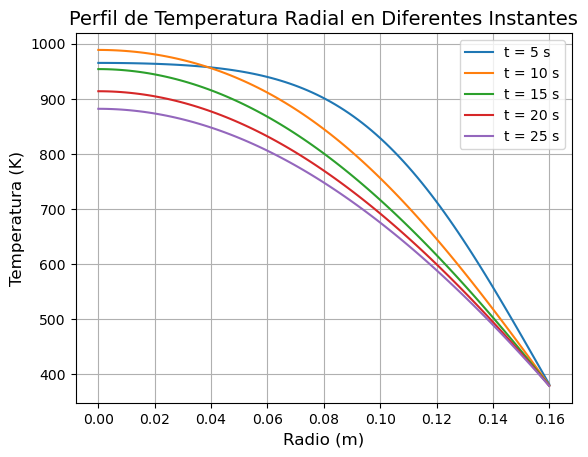

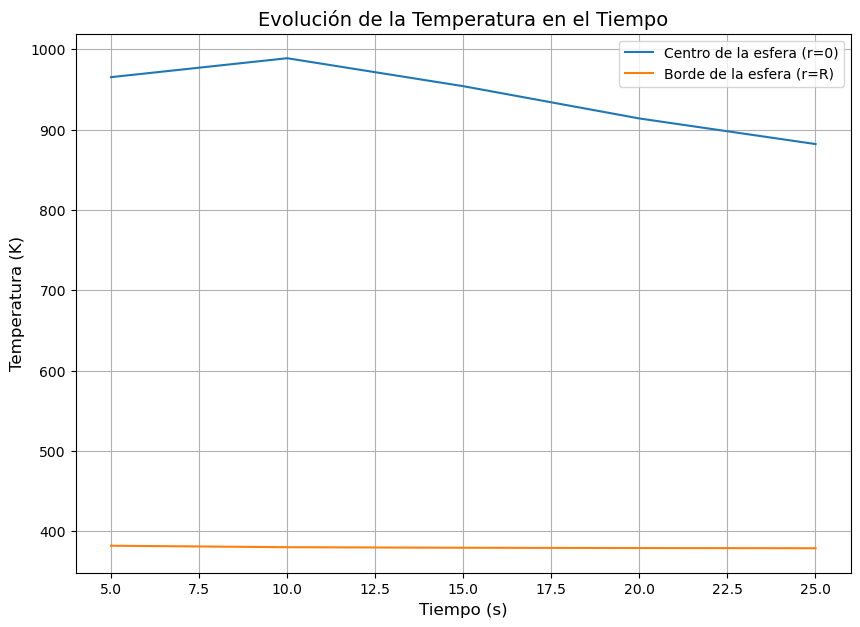

[5.000309614444519, 10.000619228889311, 15.000928843334105, 20.001238457777745, 25.001548072221098]
[np.float64(965.1603872638503), np.float64(988.7190829422511), np.float64(953.9256143549743), np.float64(913.7462615999002), np.float64(881.8916137066217)]


In [52]:
t_vec = X
T_num = Y

for i in range(len(t_vec)):
    tiempo = t_vec[i]
    perfil_T = T_num[i]
    plt.plot(r, perfil_T, label=f't = {tiempo:.0f} s')

plt.xlabel('Radio (m)', fontsize=12)
plt.ylabel('Temperatura (K)', fontsize=12)
plt.title('Perfil de Temperatura Radial en Diferentes Instantes', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

T_centro = [perfil[0] for perfil in T_num]
T_borde = [perfil[-1] for perfil in T_num]

plt.figure(figsize=(10, 7))

plt.plot(t_vec, T_centro, label='Centro de la esfera (r=0)')
plt.plot(t_vec, T_borde, label='Borde de la esfera (r=R)')

plt.xlabel('Tiempo (s)', fontsize=12)
plt.ylabel('Temperatura (K)', fontsize=12)
plt.title('Evolución de la Temperatura en el Tiempo', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

print(t_vec)
print(T_centro)

#### P2) Encuentre el flujo de calor en W removido de la esfera por el sumidero de calor después de 24 segundos de haber iniciado el protocolo de seguridad

Calculamos el flujo de calor que sale de la esfera a los 24 segundos:

$$\dot{Q} = 4 \pi R^2 h (T|_{N_R}(t=24 s)-T_{\infty}) $$

In [32]:
# Resuelva para 24 segundos


# Extraiga la temperatura de la pared


# Calcule e imprima el flujo de calor después de 24 segundos



#### P3 y P4) Encuentre la temperatura máxima de la esfera y el tiempo en que esta temperatura se alcanza

Sugerencias:

* Para sus cálculos, considere un tiempo de simulación lo suficientemente largo para asegurarse de que el perfil de temperatura llega a un estado estacionario.
* Modifique la iteración FTCS para almacenar la temperatura máxima en un tiempo determinado y el tiempo en la que esta ocurra.

In [33]:
# Resolvemos para un tiempo suficientemente largo a partir de los perfiles de temperatura



### P5) Calcule la temperatura promedio después de 3600 s

Sugerencia: recuerde que el promedio de una función escalar en coordenadas cilíndricas es:

$$ \left\langle T\right\rangle=\frac{\int_{0}^{2\pi}\int_{0}^{\pi}\int_{0}^{R}{T\left(r\right)r^2drd\theta d\varphi}}{\int_{0}^{2\pi}\int_{0}^{\pi}\int_{0}^{R}{r^2drd\theta d\varphi}} $$

In [34]:
# Resuelva para 60 segundos


# Calcule la temperatura promedio después de una hora utilizando el método trapezoidal o similar

